In [1]:
import pandas as pd
import ast
import os
import json

### Decomposition (Motion, Music data merged)

In [24]:
### Out-of-sample data merged
df = pd.read_csv(r'G:\mmsynergy\outofsample\regression\mult_mtl_contextual785.csv', index_col = 0)
df['id'] = df.id.apply(lambda x: ast.literal_eval(x)[0])
df1 = pd.read_csv(r'G:\mmsynergy\outofsample\regression\all_dist_mtl_last_oos_contextual.csv', index_col = 0)
df['id'] = df.id.astype(str)
df1['id'] = df1.id.astype(str)
temp1 = df.merge(df1[['id', 'dtw','correlation', 'cosine', 'pearson']], on = 'id', how = 'left')

In [25]:
### In sample data merged
df = pd.read_csv(r'G:\mmsynergy\regression\mtl_insample.csv', index_col=0)
df['id'] = df.id.apply(lambda x: ast.literal_eval(x)[0])
df1 = pd.read_csv(r'G:\mmsynergy\regression\all_dist_mtl_last.csv', index_col=0)
df['id'] = df.id.astype(str)
df1['id'] = df1.id.astype(str)
temp2 = df.merge(df1[['id', 'cosine']], on = 'id', how = 'inner') # shape (49634, 8)

In [26]:
### Other features
d = pd.read_csv(r'G:\mmsynergy\regression\concat_final.csv')
d.id = d.id.astype(str)
d = d[['id', 'text','createtime', 'duration', 'digg_count', 'share_count', 'play_count',
       'comment_count', 'isAd', 'author_id', 'uniqueId', 'nickname',
       'signature', 'verified_author', 'music_id', 'music_name',
       'music_author', 'music_original', 'challenges', 'follower', 'following',
       'like', 'video', 'genre', 'bpm', 'beats_per_video', 'gender', 'race', 'emo', 'age', 'create_date']]
#d.rename(columns = {'duration_y': 'duration'}, inplace = True)
d['create_day'] = pd.to_datetime(d.createtime).dt.weekday

C:\Users\tun64385\AppData\Local\Temp\ipykernel_5152\2004883652.py:2: DtypeWarning: Columns (28,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv(r'G:\mmsynergy\regression\concat_final.csv')


In [27]:
t = pd.concat([temp1, temp2], axis = 0, ignore_index = True)
f = t.merge(d,on='id', how = 'inner') # shape (71003, 42)
#f.to_csv('/mnt/g/mmsynergy/regression/mult_mtl_contextual_reg_merged.csv', index = False)

In [28]:
# merged with musci motion, facial expressions and motion movements
df = pd.read_csv(r'G:\mmsynergy\regression\motion_total.csv', index_col=0)
df.id = df.id.astype(str)
merged = pd.read_csv(r'G:\mmsynergy\regression\mult_mtl_contextual_reg_merged.csv')
merged.id = merged.id.astype(str)
final = merged.merge(df, on = 'id', how = 'inner')
music = pd.read_csv(r"G:\mmsynergy\features\music\music_mood.csv", index_col=0)
music.id = music.id.astype(str)
merged = final.merge(music, on = 'id', how = 'inner') # merged 52021
merged = merged.merge(results, on = 'id', how = 'inner')

C:\Users\tun64385\AppData\Local\Temp\ipykernel_5152\2814154166.py:4: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv(r'G:\mmsynergy\regression\mult_mtl_contextual_reg_merged.csv')


In [29]:
merged

,id,play_pred,play_true,digg_pred,digg_true,comment_pred,comment_true,cosine,text,createtime,...,party,relaxed,sad_x,angry,disgust,fear,happy_y,sad_y,surprise,neutral
0,7057372326249303342,7.620689,7.644919,4.783670,4.330733,2.002839,2.079442,0.955911,DAMN THIS SONG IS SOO CUTE !! 😮‍💨🤠 #beforeikne...,2022-01-26 04:49:02,...,0.023559,0.868227,0.853432,18.406415,0.856409,21.326049,24.479852,29.000173,0.305973,5.62513
1,6861558871211773186,4.524050,3.178054,2.494967,2.079442,-0.011312,0.000000,0.931203,#80heartsduetthis #remixdancechallenge,2020-08-16 12:32:59,...,0.018035,0.783742,0.802854,3.021995,0.017836,50.325958,4.535803,24.868171,2.263693,14.966543
2,6842784460648353029,10.282144,10.772792,7.545043,7.820038,3.461169,3.091043,1.025514,Props to my mom who always films my videos aha...,2020-06-26 22:18:33,...,0.446218,0.420669,0.253044,0.44337,0.005906,1.228545,2.668052,27.939522,0.069378,67.645228
3,6819414186251013381,8.799308,6.538140,6.332161,4.624973,2.174445,1.098612,0.893193,#saysochallenge 🤗🤗🤗,2020-04-24 22:49:55,...,0.003310,0.788610,0.874630,0.068279,0.002761,0.016954,71.268728,28.368243,0.000122,0.274915
4,6816109002154396934,6.218486,5.472270,3.590255,1.791759,0.835583,0.000000,1.005591,What you say 😋#getmoney #getmoneychallenge #ge...,2020-04-16 01:04:09,...,0.003947,0.874145,0.710225,0.203898,0.000073,34.741255,26.463923,22.500941,0.010185,16.07972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49623,6810502230270037254,6.951895,7.667626,4.421947,5.273000,1.536154,0.693147,1.043251,Wash your fucking hands #stupid #friends #hand...,2020-03-31 22:27:05,...,0.326886,0.441608,0.284976,77.471225,0.009233,10.33392,0.000922,11.396778,0.000287,0.787633
49624,7240944866170047749,6.017129,6.040255,3.604321,3.663562,0.421487,0.000000,0.862219,#thisyear #thisyearchallenge #money #year #abu...,2023-06-04 21:24:19,...,0.000391,0.934483,0.987347,6.714295,0.001179,7.993491,2.184424,75.74039,0.28653,7.079693
49625,7241785573076110597,6.046792,6.322565,3.767196,3.465736,0.609313,1.098612,0.909364,#whatitischallenge,2023-06-07 03:46:40,...,0.319305,0.442769,0.646934,3.190125,0.0,1.882636,34.95856,3.434108,0.00009,56.534484
49626,6835997081086332162,7.157885,11.473301,4.633343,8.610501,1.404142,5.717028,0.962887,#savagelove #savagelovedancechallenge #tiktokf...,2020-06-08 15:20:05,...,0.027894,0.694146,0.652634,2.355763,0.006426,29.748786,39.223297,24.648517,0.077421,3.939792


In [30]:
merged.to_csv(r'G:\mmsynergy\regression\mmsynergy_decomposition.csv')

<AxesSubplot:>

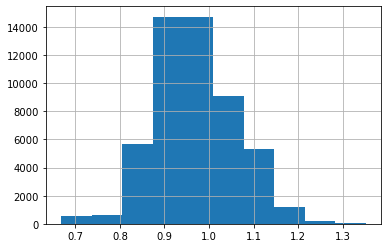

In [21]:
merged.cosine.hist()

### Combine facial emotion data

In [20]:
results = pd.DataFrame(columns = ['id', 'angry','disgust','fear','happy','sad','surprise','neutral'])
for i in os.listdir(r'G:\mmsynergy\features\deepface'):
    print(i, os.listdir(r'G:\mmsynergy\features\deepface').index(i))
    df = pd.read_csv(os.path.join(r'G:\mmsynergy\features\deepface', i))
    new = pd.DataFrame(df['0'].apply(lambda x: ast.literal_eval(x)['emotion']).apply(pd.Series).mean(axis = 0)).transpose()
    new.insert(0, "id", i.split('.csv')[0])
    results = pd.concat([results, new], ignore_index=True)


6641503426909834502.csv 0
6643349998559825157.csv 1
6644048274107927813.csv 2
6645216856544120066.csv 3
6645847098686180613.csv 4
6646560018407623941.csv 5
6646587213221989637.csv 6
6646746668404313350.csv 7
6647087141694213382.csv 8
6647403231322311942.csv 9
6648048446039133445.csv 10
6648542038373436678.csv 11
6648945811008785669.csv 12
6649218781421800709.csv 13
6649646141480635654.csv 14
6649934014649994501.csv 15
6650052371562908933.csv 16
6650705676630756613.csv 17
6651566436823076101.csv 18
6651859010704116998.csv 19
6652084153325980933.csv 20
6653315954950278405.csv 21
6653824024973413637.csv 22
6655280922889293062.csv 23
6655581467369868546.csv 24
6655959817099693318.csv 25
6656399866949815557.csv 26
6656523699744673030.csv 27
6657406263959227654.csv 28
6657936197454662918.csv 29
6658223039915756806.csv 30
6658276353869090054.csv 31
6658924770639219974.csv 32
6659137462599683333.csv 33
6659214627592736006.csv 34
6660503084038360325.csv 35
6660929375204019462.csv 36
66611556854

In [22]:
results.to_csv(r'G:\mmsynergy\regression\facial_emotion.csv', index=False)

In [131]:
df = pd.read_csv('/mnt/g/mmsynergy/outofsample/regression/mult_mtl_contextual.csv', index_col = 0)
df['id'] = df.id.apply(lambda x: ast.literal_eval(x)[0])
df1 = pd.read_csv('/mnt/g/mmsynergy/outofsample/regression/all_dist_mtl_last_oos.csv', index_col = 0)
df['id'] = df.id.astype(str)
df1['id'] = df1.id.astype(str)
temp1 = df.merge(df1[['id', 'cosine']], on = 'id', how = 'left')

In [48]:
d = pd.read_csv('/mnt/g/mmsynergy/outofsample/data/mtl_reg.csv')
d.id = d.id.astype(str)
d = d[['id', 'text','createtime', 'duration_y', 'digg_count', 'share_count', 'play_count',
       'comment_count', 'isAd', 'author_id', 'uniqueId', 'nickname',
       'signature', 'verified_author', 'music_id', 'music_name',
       'music_author', 'music_original', 'challenges', 'follower', 'following',
       'like', 'video', 'genre', 'bpm', 'beats_per_video', 'gender', 'race', 'emo', 'age', 'create_date']]
d.rename(columns = {'duration_y': 'duration'}, inplace = True)
d['create_day'] = pd.to_datetime(d.createtime).dt.weekday

In [49]:
final = d.merge(temp1, on='id', how = 'right')

In [50]:
final.to_csv('/mnt/g/mmsynergy/outofsample/regression/mult_mtl_contextual785_reg.csv', index = False)

In [130]:
df = pd.read_csv(r'G:\mmsynergy\regression\mult_mtl_contextual.csv', index_col = 0)
df['id'] = df.id.apply(lambda x: ast.literal_eval(x)[0])
df1 = pd.read_csv(r'G:\mmsynergy\regression\all_dist_mtl_last.csv', index_col = 0)
df['id'] = df.id.astype(str)
df1['id'] = df1.id.astype(str)
temp2 = df.merge(df1[['id', 'cosine']], on = 'id', how = 'left')


<AxesSubplot:>

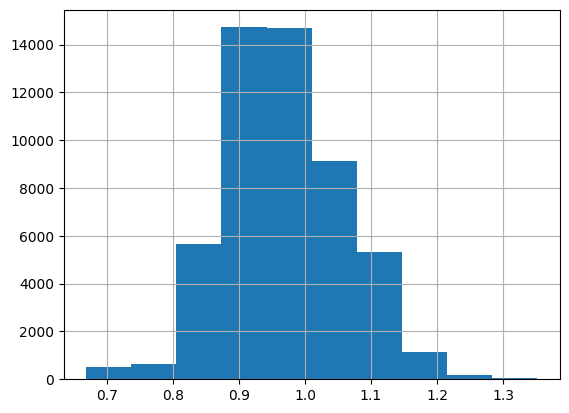

In [41]:
df1.cosine.hist()

In [55]:
# Read the pickle file

df_pickle_digg = pd.read_pickle('/mnt/g/mmsynergy/model/data/digg.pkl')

In [56]:
df_pickle_digg.keys()

dict_keys(['train', 'valid', 'test'])

In [57]:
df_pickle_digg['train'].keys()

dict_keys(['vision', 'audio', 'text', 'id', 'labels', 'label_p'])

In [63]:
import pickle
with open('/mnt/g/mmsynergy/model/data/digg_noplay.pkl', 'wb') as f:
    pickle.dump(df_pickle_digg, f)
print('/mnt/g/mmsynergy/model/data/digg_noplay.pkl')

/mnt/g/mmsynergy/model/data/digg_noplay.pkl


In [12]:
import pandas as pd
d = pd.read_csv('/mnt/g/mmsynergy/outofsample/regression/mult_mtl_contextual_reg.csv')
d['id'] = d['id'].astype(str)

In [14]:
d.columns

Index(['id', 'text', 'createtime', 'duration', 'digg_count', 'share_count',
       'play_count', 'comment_count', 'isAd', 'author_id', 'uniqueId',
       'nickname', 'signature', 'verified_author', 'music_id', 'music_name',
       'music_author', 'music_original', 'challenges', 'follower', 'following',
       'like', 'video', 'genre', 'bpm', 'beats_per_video', 'gender', 'race',
       'emo', 'age', 'create_date', 'create_day', 'play_pred', 'play_true',
       'digg_pred', 'digg_true', 'comment_pred', 'comment_true', 'cosine'],
      dtype='object')

In [18]:
import os
import numpy as np
audio_f_path = '/mnt/d/data/audio_features/'
video_f_path = '/mnt/g/mmsynergy/alphapose_2d_norm/' 
text_f_path = '/mnt/g/mmsynergy/bert/'
audio_json  = [audio_f_path+a for a in os.listdir(audio_f_path)]


clean_ids = [i.split('.mp4')[0] for i in os.listdir('/mnt/g/mmsynergy/outofsample/videos/') if i.endswith('.mp4')]
print(len(clean_ids))
# all_ids = visual_id_train + visual_id_valid + visual_id_test
# print(len(all_ids))
video = pd.read_csv('/mnt/g/mmsynergy/singles_meta_cleaned.csv')
video['id'] = video['id'].astype(str)
video = video[~video.text.isnull()]
tutorial_id = video.loc[video["text"].str.contains("tutorial"),'id'].to_list()
clean_ids = [i for i in clean_ids if i not in tutorial_id]
print(len(clean_ids))
beats = pd.read_csv('/mnt/g/mmsynergy/music_beats_duration.csv', index_col=0)
beats['id'] = beats['id'].astype(str)
beats = beats[beats.id.isin(clean_ids)]
#beats = beats[beats.beats_per_video <= 50]
max_beats = int(beats['beats_per_video'].max())
print(max_beats)
#video = pd.read_csv('/mnt/f/erya/mmsynergy/singles_meta_cleaned.csv')
#video['id'] = video['id'].astype(str)
single = video[video.id.isin(beats.id)]
print(single.shape)
d = pd.read_csv('/mnt/g/mmsynergy/outofsample/regression/mult_mtl_contextual_reg.csv')
d['id'] = d['id'].astype(str)
single = single.merge(d[['id', 'follower', 'following', 'like',
       'video', 'genre', 'bpm', 'beats_per_video', 'gender', 'race', 'emo',
       'age', 'create_date', 'create_day','duration']], on='id', how = 'left')
single = single[single.gender.notnull()]
single[['follower', 'following', 'like', 'video']] = single[['follower', 'following', 'like', 'video']].replace(np.nan,0)
print(single.shape)

27997


/home/research/anaconda3/envs/mp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (13,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


27406
177
(25118, 27)
(21369, 41)


In [23]:
single = single.drop(columns = ['duration_x'])
single.rename(columns = {'duration_y': 'duration'}, inplace = True)

In [24]:
single.columns

Index(['id', 'text', 'createtime', 'digg_count', 'share_count', 'play_count',
       'comment_count', 'isAd', 'author_id', 'uniqueId', 'nickname',
       'signature', 'verified_author', 'author_following_count',
       'author_follower_count', 'author_heart_count', 'author_video_count',
       'author_digg_count', 'music_id', 'music_name', 'music_author',
       'music_original', 'challenges', 'shallow_log', 'deep_log',
       'bert_embedding', 'follower', 'following', 'like', 'video', 'genre',
       'bpm', 'beats_per_video', 'gender', 'race', 'emo', 'age', 'create_date',
       'create_day', 'duration'],
      dtype='object')

In [19]:
8547/21369

0.3999719219430015

In [15]:
d.duration

0        10.210023
1        16.020000
2        14.600000
3        10.240000
4        14.440000
           ...    
25113    16.680000
25114    19.390023
25115     9.100000
25116    19.270023
25117    15.070023
Name: duration, Length: 25118, dtype: float64

In [25]:
import pickle
with open('/mnt/g/mmsynergy/outofsample/data/pkl/mtl_context785.pkl', 'rb') as f:
    df_pickle_play = pickle.load(f)
df_pickle_play['train']['text'].shape
##total_length = len(df_pickle_play['train']['vision']) + len(df_pickle_play['valid']['vision']) + len(df_pickle_play['test']['vision'])
#print(total_length)

(8547, 1, 768)

In [4]:
import pickle
with open('/mnt/g/mmsynergy/outofsample/data/pkl/comment.pkl', 'rb') as f:
    df_pickle_play = pickle.load(f)
total_length = len(df_pickle_play['train']['vision']) + len(df_pickle_play['valid']['vision']) + len(df_pickle_play['test']['vision'])
print(total_length)

25118


In [161]:
df_pickle_play['train'].keys()

dict_keys(['vision', 'audio', 'text', 'id', 'labels1', 'labels2', 'label_p'])

In [64]:
# Read the pickle file
df_pickle = pd.read_pickle('/mnt/g/mmsynergy/model/data/comment.pkl')
df_pickle['train'].pop('label_p')
df_pickle['valid'].pop('label_p')
df_pickle['test'].pop('label_p')
with open('/mnt/g/mmsynergy/model/data/comment_noplay.pkl', 'wb') as f:
    pickle.dump(df_pickle, f)
print('/mnt/g/mmsynergy/model/data/comment_noplay.pkl')

/mnt/g/mmsynergy/model/data/comment_noplay.pkl


In [163]:
# Read the pickle file
df_pickle = pd.read_pickle('/mnt/g/mmsynergy/model/data/mtl_contextual_censored.pkl')
df_pickle['train'].pop('labels1')
df_pickle['valid'].pop('labels1')
df_pickle['test'].pop('labels1')
df_pickle['train'].pop('labels2')
df_pickle['valid'].pop('labels2')
df_pickle['test'].pop('labels2')
df_pickle['train']['labels'] = df_pickle['train'].pop('label_p')
df_pickle['valid']['labels'] = df_pickle['valid'].pop('label_p')
df_pickle['test']['labels'] = df_pickle['test'].pop('label_p')
with open('/mnt/g/mmsynergy/model/data/play_contextual_censored.pkl', 'wb') as f:
    pickle.dump(df_pickle, f)
print('/mnt/g/mmsynergy/model/data/play_contextual_censored.pkl')

/mnt/g/mmsynergy/model/data/play_contextual_censored.pkl


In [69]:
# Read the pickle file
df_pickle = pd.read_pickle('/mnt/g/mmsynergy/model/data/comment.pkl')
df_pickle['train'].pop('labels')
df_pickle['valid'].pop('labels')
df_pickle['test'].pop('labels')
df_pickle['train']['labels'] = df_pickle['train'].pop('label_p')
df_pickle['valid']['labels'] = df_pickle['valid'].pop('label_p')
df_pickle['test']['labels'] = df_pickle['test'].pop('label_p')
with open('/mnt/g/mmsynergy/model/data/play.pkl', 'wb') as f:
    pickle.dump(df_pickle, f)
print('/mnt/g/mmsynergy/model/data/play.pkl')

/mnt/g/mmsynergy/model/data/play.pkl


In [126]:
c = pd.read_csv('/mnt/g/mmsynergy/regression/mtl_reg_metrics_comments50.csv')

In [128]:
c.columns.to_list()

['id',
 'digg_pred',
 'comment_pred',
 'digg_true',
 'comment_true',
 'text',
 'createtime',
 'digg_count',
 'share_count',
 'play_count',
 'comment_count',
 'isAd',
 'author_id',
 'uniqueId',
 'nickname',
 'signature',
 'verified_author',
 'music_id',
 'music_name',
 'music_author',
 'music_original',
 'challenges',
 'follower',
 'following',
 'like',
 'video',
 'genre',
 'bpm',
 'beats_per_video',
 'duration',
 'gender',
 'race',
 'emo',
 'age',
 'create_date',
 'create_day',
 'cosine_cross_comment',
 'cosine_cross_digg',
 'cosine_nocross_comment',
 'cosine_nocross_digg',
 'cosine_mtl',
 'beat_align',
 'beat_coverage',
 'hit_rate',
 'hashtags',
 'hashtags_views',
 'hashtags_popularity',
 'virality_index',
 'hashtags_viewsperpost',
 'WC',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'WPS',
 'BigWords',
 'Dic',
 'Linguistic',
 'function',
 'pronoun',
 'ppron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'ipron',
 'det',
 'article',
 'number',
 'prep',
 'auxverb',
 'adverb',
 'conj',
 'n

In [129]:
c = c[['id', 'text','createtime', 'duration', 'digg_count', 'share_count', 'play_count',
       'comment_count', 'isAd', 'author_id', 'uniqueId', 'nickname',
       'signature', 'verified_author', 'music_id', 'music_name',
       'music_author', 'music_original', 'challenges', 'follower', 'following',
       'like', 'video', 'genre', 'bpm', 'beats_per_video', 'gender', 'race', 'emo', 'age', 'create_date', 'beat_align',
 'beat_coverage',
 'hit_rate',
 'hashtags',
 'hashtags_views',
 'hashtags_popularity',
 'virality_index',
 'hashtags_viewsperpost',
 'WC',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'WPS',
 'BigWords',
 'Dic',
 'Linguistic',
 'function',
 'pronoun',
 'ppron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'ipron',
 'det',
 'article',
 'number',
 'prep',
 'auxverb',
 'adverb',
 'conj',
 'negate',
 'verb',
 'adj',
 'quantity',
 'Drives',
 'affiliation',
 'achieve',
 'power',
 'Cognition',
 'allnone',
 'cogproc',
 'insight',
 'cause',
 'discrep',
 'tentat',
 'certitude',
 'differ',
 'memory',
 'Affect',
 'tone_pos',
 'tone_neg',
 'emotion',
 'emo_pos',
 'emo_neg',
 'emo_anx',
 'emo_anger',
 'emo_sad',
 'swear',
 'Social',
 'socbehav',
 'prosocial',
 'polite',
 'conflict',
 'moral',
 'comm',
 'socrefs',
 'family',
 'friend',
 'female',
 'male',
 'Culture',
 'politic',
 'ethnicity',
 'tech',
 'Lifestyle',
 'leisure',
 'home',
 'work',
 'money',
 'relig',
 'Physical',
 'health',
 'illness',
 'wellness',
 'mental',
 'substances',
 'sexual',
 'food',
 'death',
 'need',
 'want',
 'acquire',
 'lack',
 'fulfill',
 'fatigue',
 'reward',
 'risk',
 'curiosity',
 'allure',
 'Perception',
 'attention',
 'motion',
 'space',
 'visual',
 'auditory',
 'feeling',
 'time',
 'focuspast',
 'focuspresent',
 'focusfuture',
 'Conversation',
 'netspeak',
 'assent',
 'nonflu',
 'filler',
 'AllPunc',
 'Period',
 'Comma',
 'QMark',
 'Exclam',
 'Apostro',
 'OtherP',
 'Emoji',
 'ncomments']]

In [135]:
c.shape

(4842, 158)

In [136]:
c['id'] = c.id.astype(str)
c1 = c.merge(t, on = 'id', how = 'inner')

In [137]:
c1.to_csv('/mnt/g/mmsynergy/regression/mult_mtl_contextual_reg_merged_comments50.csv', index = False)

In [145]:
m = pd.read_csv('/mnt/g/mmsynergy/outofsample/regression/mtl_reg_stl_nocross_beatalign_beatcov.csv')
m1 = pd.read_csv("/mnt/g/mmsynergy/outofsample/regression/mult_mtl_contextual_reg.csv")
m2 = m1.merge(m[['id', 'beat_align', 'beat_coverage', 'hit_rate']], on = 'id', how = 'inner')
m2.to_csv('/mnt/g/mmsynergy/outofsample/regression/mult_mtl_contextual_reg_merged_beatalign_beatcov.csv', index = False)

In [143]:
m1

,id,text,createtime,duration,digg_count,share_count,play_count,comment_count,isAd,author_id,...,age,create_date,create_day,play_pred,play_true,digg_pred,digg_true,comment_pred,comment_true,cosine
0,6978889650131979525,👷🏼‍♂️,2021-06-28 16:56:12,10.210023,91889.0,1778.0,582081.0,1263.0,False,6.788577e+18,...,35.000000,2021-06-28,0.0,14.280269,13.274366,12.544860,11.428348,7.295350,7.142036,0.893202
1,7259210077133884677,Same as usual #fyp #foryou #fypage #letsbevira...,2023-07-24 02:42:38,16.020000,7877.0,136.0,139664.0,70.0,False,7.883648e+16,...,32.666667,2023-07-24,0.0,10.072036,11.847002,7.330212,8.971829,3.619200,4.262680,0.923172
2,7213698695840222491,我性感嗎👍@祐祐兄弟(小號) @💫羽琪✨販賣溫柔✨互關,2023-03-23 11:15:18,14.600000,13.0,3.0,573.0,1.0,False,6.576222e+18,...,24.000000,2023-03-23,3.0,6.643377,6.352629,4.508728,2.639057,2.198127,0.693147,0.907457
3,7236579395966700805,que bello trend 🫶🏻 #fyp #parati,2023-05-24 03:04:04,10.240000,71728.0,130.0,1145920.0,79.0,False,2.551735e+07,...,34.600000,2023-05-24,2.0,12.866240,13.951719,10.329491,11.180651,5.043373,4.382027,0.873223
4,7254836041603976450,Super Shy - New Jeans #踊ってみた #supershy #newjea...,2023-07-12 07:49:13,14.440000,435.0,2.0,10339.0,5.0,False,7.237492e+18,...,28.500000,2023-07-12,2.0,12.665542,9.243775,9.880997,6.077642,5.172482,1.791759,0.978405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25113,7270219299845852417,Remix dance here we go! #dance #challenge #you...,2023-08-22 18:44:08,16.680000,62.0,1.0,516.0,7.0,False,6.931452e+18,...,31.800000,2023-08-22,1.0,6.938657,6.248043,4.196661,4.143135,0.924661,2.079442,1.151490
25114,7228161192823442694,Dc: @Aira Casim ♌ #fypシ #foryoupage #whatitisc...,2023-05-01 10:37:07,19.390023,126.0,0.0,1562.0,5.0,False,6.568573e+18,...,30.400000,2023-05-01,0.0,7.517623,7.354362,4.750921,4.844187,1.640465,1.791759,1.031829
25115,7263597744663645445,شروق #crc_شروق #سوزي #shutdown #shutdownblackp...,2023-08-04 22:29:02,9.100000,2320.0,35.0,84392.0,35.0,False,3.151753e+17,...,29.800000,2023-08-04,4.0,10.746921,11.343240,7.939900,7.749753,3.722729,3.583519,0.972235
25116,7170353338582633733,#dc : @marcdanielbernardo #dancechallenge #202...,2022-11-26 15:53:07,19.270023,62.0,0.0,2421.0,0.0,False,2.044408e+17,...,31.000000,2022-11-26,5.0,7.469345,7.792349,4.194530,4.143135,1.399297,0.000000,1.112084


In [140]:
m[['id', 'beat_align', 'beat_coverage', 'hit_rate']]

,id,beat_align,beat_coverage,hit_rate
0,6827378819775679746,1.355272e-01,0.285714,0.900000
1,7196766509694258475,2.856550e-02,0.052632,1.000000
2,7264050897137798446,0.000000e+00,0.000000,NaN
3,7266957690360909099,0.000000e+00,0.000000,NaN
4,7270296965479484715,1.522998e-08,0.043478,1.000000
...,...,...,...,...
23267,7263222877325987102,3.865920e-03,0.047619,1.000000
23268,7258008862517644550,1.353353e-01,0.020408,1.000000
23269,6755264707503983877,1.970433e-01,0.791667,0.684211
23270,6814563515228065030,2.358691e-01,0.580645,1.000000
